In [1]:
import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append('py/') 

from functions import initialize, get_points_within_target_region, df2gdf, plot_map
from preprocess import preprocess_data
from map_matching import map_match_csv2gpx
from generate_route_by_pyroutelib import generate_osm_routes_main


#### Initialize system:
- remove old data
- create necessary directories

In [2]:
initialize()

Cleaning dirs: input/ and output/ 


#### Remove input points outside of target boundary

- ananymize ap_id column
- clip points within boundary

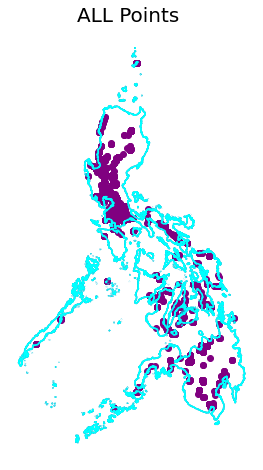

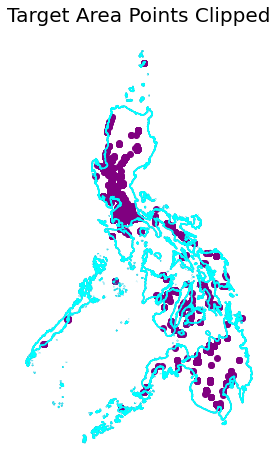

In [3]:
gps_csv = '/home/bidur/map_match_gps_data/raw_data/PHL_10000.csv'#'/home/bidur/map_match_gps_data/raw_data/3368.csv'
#gps_csv = '/home/bidur/map_match_gps_data/raw_data/PHL_20190703_anonymized.csv'#'raw_data/gps_probe_Nepal.csv'#'raw_data/PHL_20190703_BOM.csv'
gdf_probe_clipped, gdf_target = get_points_within_target_region (gps_csv, anonymize=True, display_plot = True)
#gdf_probe_clipped.head()

#### Preprocess input points

In [4]:
# 1. cleaning data & applying sampling
df_sample = preprocess_data()
df_sample.head(2)

,ap_id,timestamp,latitude,longitude
0,6182,2019-07-03 14:19:30,14.634576,121.063787
1,6182,2019-07-03 00:53:30,14.634629,121.063428


#### map matching with osm roads using graphhopper

In [ ]:
# map matching
df_mapped_route = map_match_csv2gpx(df_sample)

Very Few Data (<10 points) in <<  469  >> ap_ids
299  csv file prepared and saved in  /home/bidur/map_match_gps_data/input/csv
/home/bidur/map_match_gps_data/input/csv/7559.csv
/home/bidur/map_match_gps_data/input/csv/2803.csv
/home/bidur/map_match_gps_data/input/csv/51.csv
/home/bidur/map_match_gps_data/input/csv/2763.csv
/home/bidur/map_match_gps_data/input/csv/160.csv
/home/bidur/map_match_gps_data/input/csv/14.csv
/home/bidur/map_match_gps_data/input/csv/4748.csv
/home/bidur/map_match_gps_data/input/csv/3105.csv
/home/bidur/map_match_gps_data/input/csv/8002.csv
/home/bidur/map_match_gps_data/input/csv/1134.csv
/home/bidur/map_match_gps_data/input/csv/3519.csv
/home/bidur/map_match_gps_data/input/csv/2263.csv
/home/bidur/map_match_gps_data/input/csv/5113.csv
/home/bidur/map_match_gps_data/input/csv/3395.csv
/home/bidur/map_match_gps_data/input/csv/408.csv
/home/bidur/map_match_gps_data/input/csv/4744.csv
/home/bidur/map_match_gps_data/input/csv/5783.csv
/home/bidur/map_match_gps_dat

In [ ]:
df_mapped_route.head()

In [ ]:
gdf_mapped = df2gdf(df_mapped_route)
plot_map(gdf_mapped, gdf_target, "Final GPS Probe") 

# Generate MORE route points by using pyroutelib (Internet connection needed)

In [ ]:
# generate_osm_routes_main( )